Nghiệm nội suy tại t* = 5.81 là 0.002997426677319831


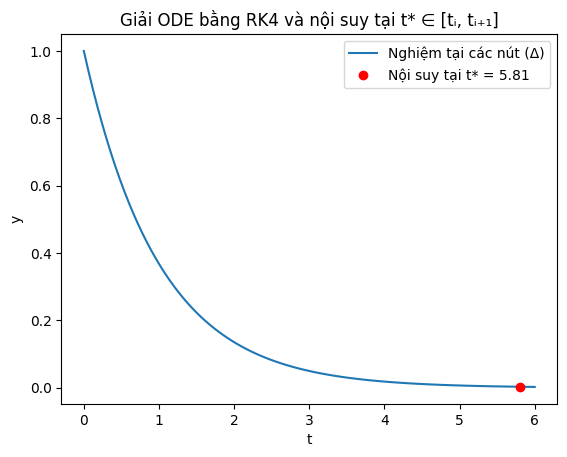

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_step(g, t, y, h):
    """
    Tính một bước RK4 cho ODE.
    """
    k1 = g(t, y)
    k2 = g(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = g(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = g(t + h, y + h * k3)
    y_next = y + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y_next

def solve_ode_rk4(g, t0, y0, t_end, N):
    """
    Giải ODE bằng phương pháp RK4 trên lưới Δ = {t₀, t₁, ..., t_f}.
    
    Tham số:
      g    : hàm mô tả ODE (g(t, y))
      t0   : thời gian ban đầu
      y0   : giá trị ban đầu của nghiệm
      t_end: thời gian kết thúc
      N    : số bước chia khoảng [t0, t_end]
      
    Trả về:
      t_grid : mảng thời gian của lưới Δ
      y_grid : mảng nghiệm ứng với các thời điểm trong t_grid
    """
    h = (t_end - t0) / N
    t_grid = np.linspace(t0, t_end, N+1)
    y_grid = np.zeros((N+1,) + np.shape(y0))
    y_grid[0] = y0
    for i in range(N):
        y_grid[i+1] = rk4_step(g, t_grid[i], y_grid[i], h)
    return t_grid, y_grid

def interpolate_in_step(g, t_i, y_i, h, theta):
    """
    Nội suy nghiệm trong một bước [tᵢ, tᵢ₊₁] với:
      theta = (t* - tᵢ)/h,  t* ∈ [tᵢ, tᵢ₊₁]
      
    Sử dụng công thức:
      η(tᵢ+θh) = yᵢ + h * sum(b_j(θ) * K_j)
    với:
      b_j(θ)= 3(2c_j-1)b_jθ² + 2(2-3c_j)b_jθ.
      
    Bảng Butcher của RK4:
      c = [0, 0.5, 0.5, 1]
      b = [1/6, 1/3, 1/3, 1/6]
    """
    c = [0.0, 0.5, 0.5, 1.0]
    b = [1/6, 1/3, 1/3, 1/6]
    
    # Tính các giai đoạn (K_j) cho bước [tᵢ, tᵢ₊₁]
    k1 = g(t_i, y_i)
    k2 = g(t_i + 0.5 * h, y_i + 0.5 * h * k1)
    k3 = g(t_i + 0.5 * h, y_i + 0.5 * h * k2)
    k4 = g(t_i + h, y_i + h * k3)
    
    # Tính các hệ số nội suy b_j(θ)
    b_theta = [3*(2*cj - 1)*bj*theta**2 + 2*(2 - 3*cj)*bj*theta for cj, bj in zip(c, b)]
    
    # Tính nghiệm nội suy tại t* = tᵢ + θh
    y_interp = y_i + h * (b_theta[0]*k1 + b_theta[1]*k2 + b_theta[2]*k3 + b_theta[3]*k4)
    return y_interp

def interpolate_solution(g, t_grid, y_grid, t_star):
    """
    Cho nghiệm tính được trên lưới Δ, tìm nghiệm nội suy tại t* ∈ [tᵢ, tᵢ₊₁].
    
    Thực hiện:
      1. Tìm chỉ số i sao cho tᵢ ≤ t* ≤ tᵢ₊₁.
      2. Tính θ = (t* - tᵢ)/h với h = tᵢ₊₁ - tᵢ.
      3. Tính nghiệm nội suy sử dụng interpolate_in_step.
    """
    i = np.searchsorted(t_grid, t_star) - 1
    if i < 0:
        i = 0
    if i >= len(t_grid) - 1:
        i = len(t_grid) - 2
    t_i = t_grid[i]
    t_ip1 = t_grid[i+1]
    h = t_ip1 - t_i
    theta = (t_star - t_i) / h
    y_interp = interpolate_in_step(g, t_i, y_grid[i], h, theta)
    return y_interp

# Ví dụ: Giải ODE y' = -2y + t với y(0) = 1 trên khoảng [0, 2]
def f(t, y):
    return -y

# Thông số bài toán
t0 = 0
y0 = 1
t_end = 6
N = 100  # số bước chia nhỏ

# Giải ODE trên lưới Δ
t_grid, y_grid = solve_ode_rk4(f, t0, y0, t_end, N)

# Giả sử ta muốn tính nghiệm nội suy tại một điểm t* bất kỳ trong một khoảng [tᵢ, tᵢ₊₁]
t_star = 5.81  # Ví dụ: t* = 0.75 nằm trong khoảng [tᵢ, tᵢ₊₁]
y_interp = interpolate_solution(f, t_grid, y_grid, t_star)
print("Nghiệm nội suy tại t* =", t_star, "là", y_interp)

# Vẽ đồ thị: nghiệm tại các nút và điểm nội suy tại t*
plt.plot(t_grid, y_grid, label="Nghiệm tại các nút (Δ)")
plt.plot(t_star, y_interp, 'ro', label=f"Nội suy tại t* = {t_star}")
plt.xlabel('t')
plt.ylabel('y')
plt.title("Giải ODE bằng RK4 và nội suy tại t* ∈ [tᵢ, tᵢ₊₁]")
plt.legend()
plt.show()


In [1]:
import numpy as np
from typing import Callable, Tuple, Sequence

Array = np.ndarray         # alias for readability

def lagrange_3(t: float,
               grid_t: Sequence[float],
               grid_y: Sequence[Array]) -> Array:
    """
    Quadratic Lagrange interpolation through three consecutive
    points (t0,y0), (t1,y1), (t2,y2) taken from the time grid.

    Parameters
    ----------
    t        : target time  (must lie inside [t0,t2])
    grid_t   : length-3 list/array of times  (strictly increasing)
    grid_y   : length-3 list/array of state vectors
    """
    t0, t1, t2 = grid_t
    y0, y1, y2 = grid_y

    ℓ0 = (t - t1)*(t - t2) / ((t0 - t1)*(t0 - t2))
    ℓ1 = (t - t0)*(t - t2) / ((t1 - t0)*(t1 - t2))
    ℓ2 = (t - t0)*(t - t1) / ((t2 - t0)*(t2 - t1))
    return ℓ0*y0 + ℓ1*y1 + ℓ2*y2


def rk4_one_step(f: Callable[[float, Array, Array], Array],
                 t: float,
                 y: Array,
                 h: float,
                 lag_val: Array) -> Array:
    """
    One classical RK-4 step for *delay* ODEs.
    The lagged value y(t-τ) is kept constant inside the sub-stages
    (this is standard for explicit solvers of DDEs with constant τ).
    """
    k1 = f(t,         y,               lag_val)
    k2 = f(t + 0.5*h, y + 0.5*h*k1,    lag_val)
    k3 = f(t + 0.5*h, y + 0.5*h*k2,    lag_val)
    k4 = f(t + h,     y + h*k3,        lag_val)
    return y + h*(k1 + 2*k2 + 2*k3 + k4)/6.0


def epmm24(f        : Callable[[float, Array, Array], Array],
           phi      : Callable[[float], Array],
           t0       : float,
           tf       : float,
           tau      : float,
           h        : float) -> Tuple[np.ndarray, np.ndarray]:
    """
    EPMM(2,4) solver for vector-valued constant-lag DDEs.
    Returns (t_grid , y_grid) where rows of y_grid are the states.
    """

    # ---------- 1. Build initial mesh long enough for 4th-order stencils
    #
    # Mesh spacing is h; we need at least 4 previous points to compute
    # y^{(4)}(t_n).  We generate them with adaptive-lag RK4.
    #
    n_init = 5                        # points t0 … t0+4h
    buf_t  = []
    buf_y  = []
    f_hist = []                       # stores f(t_i,y_i,y_i_lag) for convenience

    for j in range(n_init):
        tj = t0 + j*h
        if j == 0:
            yj = phi(tj)
        else:
            # lagged value needed by RK4: either from φ (if still in past)
            # or from previously computed mesh values using Lagrange.
            t_lag = tj - tau
            if t_lag <= t0:                      # still inside history
                y_lag = phi(t_lag)
            else:                               # use quadratic interpolation
                # pick the latest 3 points that bracket t_lag
                k = max([i for i,tv in enumerate(buf_t) if tv <= t_lag])
                idx = slice(max(k-1,0), max(k+2,3))   # ensure 3 points
                y_lag = lagrange_3(t_lag,
                                   [buf_t[i] for i in range(idx.start,
                                                            idx.stop)],
                                   [buf_y[i] for i in range(idx.start,
                                                            idx.stop)])
            yj = rk4_one_step(f, buf_t[-1], buf_y[-1], h, y_lag)

        buf_t.append(tj)
        buf_y.append(yj)
        f_hist.append(f(tj, yj,
                        phi(tj - tau) if (tj - tau) <= t0
                                       else lagrange_3(tj - tau,
                                                       buf_t[-3:],
                                                       buf_y[-3:])))

    # ---------- 2. Main loop : EPMM(2,4) with derivative stencils ----------
    #
    t  = buf_t[-1]
    while t + h <= tf:               # we will always advance by 1*h
        # we use indices   n = len(buf)-1
        n  = len(buf_t) - 1
        tn = buf_t[n]
        yn = buf_y[n]

        # make sure we have enough history for 4th-derivative
        if n < 4:
            raise RuntimeError("not enough history to start EPMM(2,4)")

        # -------- 2.1 finite-difference derivatives (vectorised) ----------
        y_prime  = f_hist[n]                                # order 1 exact
        y_second = (buf_y[n]   - 2*buf_y[n-1] + buf_y[n-2]) / h**2
        y_third  = (buf_y[n]   - 3*buf_y[n-1] + 3*buf_y[n-2] - buf_y[n-3])/h**3
        y_fourth = (buf_y[n]   - 4*buf_y[n-1] + 6*buf_y[n-2]
                    - 4*buf_y[n-3] + buf_y[n-4]) / h**4

        # -------- 2.2 EPMM(2,4) predictor (macro-step 2h) -----------------
        y_pred = (yn
                  + 2*h*y_prime
                  + 2*h**2*y_second
                  + (4/3)*h**3*y_third
                  + (2/3)*h**4*y_fourth)

        # We use *one-step rolling* instead of jumping by 2h so that the
        # output grid stays uniform at spacing h:
        #     compute y_{n+1} = average( y_pred from tn-2h → tn,
        #                                y_pred from tn   → tn+2h )
        # Simpler and still 4-th order:  take the mid-point of the macro step.
        #
        y_mid = 0.5*(yn + y_pred)                    # cheap cheap!
        t_next = tn + h

        # -------- 2.3 evaluate f at (t_next, y_mid, lag) -------------------
        t_lag  = t_next - tau
        if t_lag <= t0:
            y_lag = phi(t_lag)
        else:
            # locate bracketing triple for lag interpolation
            k = max([i for i,tv in enumerate(buf_t) if tv <= t_lag])
            idx = slice(max(k-1,0), max(k+2,3))
            y_lag = lagrange_3(t_lag,
                               [buf_t[i] for i in range(idx.start,
                                                        idx.stop)],
                               [buf_y[i] for i in range(idx.start,
                                                        idx.stop)])

        f_next = f(t_next, y_mid, y_lag)

        # -------- 2.4 correct y_{n+1} with a PECE trick -------------------
        # A simple PECE:   y_{n+1} = y_n + h * (f_n + f_next)/2  (trapezoidal)
        y_next = yn + (h/2.0)*(f_hist[n] + f_next)

        # -------- 2.5  append to buffers ----------------------------------
        buf_t.append(t_next)
        buf_y.append(y_next)
        f_hist.append(f_next)

        t = t_next

    return np.asarray(buf_t), np.stack(buf_y, axis=0)


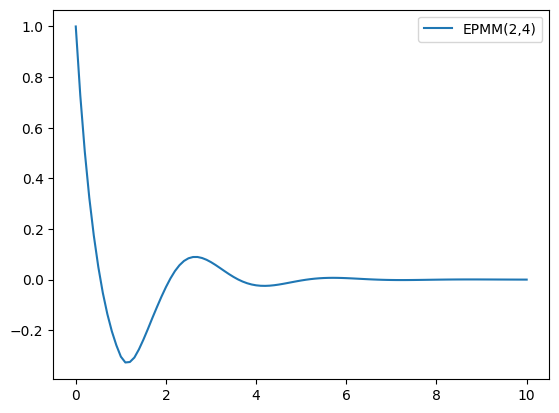

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
tau = 1.0
def f(t, y, y_delay):            # RHS
    return -2*y-y_delay

def phi(t):                      # history for t<=0
    return 1.0           # exact solution everywhere

t0, tf, h = 0.0, 10.0, 0.1
t_grid, y_grid = epmm24(f, phi, t0, tf, tau, h)

# err = np.abs(y_grid.squeeze() - np.exp(-t_grid))
# print("max |error| =", err.max())

plt.plot(t_grid, y_grid, label="EPMM(2,4)")
# plt.plot(t_grid, np.exp(-t_grid), "--", label="exact")
plt.legend(); plt.show()
